# Session 28 - Applied Statistics

- Two Sample t-test
- One-way ANOVA
- A/B Testing

## Hypothesis Testing

#### Two sample t-test

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

---

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Tips Dataset

In [2]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
smokers_tip = data[data['smoker']=='Yes']['tip']
smokers_tip.mean()

3.008709677419355

In [4]:
nonsmokers_tip = data[data['smoker']=='No']['tip']
nonsmokers_tip.mean()

2.9918543046357624

**Membuat pernyataan hipotesa**

H0: rata-rata 'tip' dari perokok **sama dengan** rata-rata 'tip' dari yang bukan perokok


H1: rata-rata 'tip' dari perokok **tidak sama dengan** rata-rata 'tip' dari yang bukan perokok

In [5]:
ttest_2 = st.ttest_ind(a=smokers_tip, b=nonsmokers_tip, equal_var=True)
ttest_2.pvalue

0.9265931522244976

Belum cukup bukti untuk menentang H0

In [6]:
smokers_tip.std()

1.4014675738128255

In [7]:
nonsmokers_tip.std()

1.37719008805297

In [8]:
male_tip = data[data['sex']=='Male']['tip']
male_tip.mean()

3.0896178343949052

In [9]:
female_tip = data[data['sex']=='Female']['tip']
female_tip.mean()

2.833448275862069

**Membuat pernyataan hipotesa**

H0: rata-rata 'tip' dari Pria **sama dengan** rata-rata 'tip' dari Wanita


H1: rata-rata 'tip' dari Pria **tidak sama dengan** rata-rata 'tip' dari Wanita

In [37]:
ttest_2 = st.ttest_ind(a=male_tip, b=female_tip, equal_var=False)
ttest_2.pvalue

0.13780683808650296

Belum cukup bukti untuk menentang H0

In [11]:
# Apakah variance kedua sample sama? (equal_var)
male_tip.std()

1.489101813842018

In [30]:
female_tip.std()

1.1594945045210154

(0.0, 10.0)

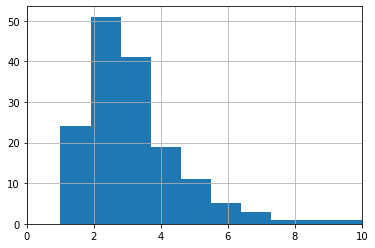

In [34]:
male_tip.hist()
plt.xlim([0, 10])

(0.0, 10.0)

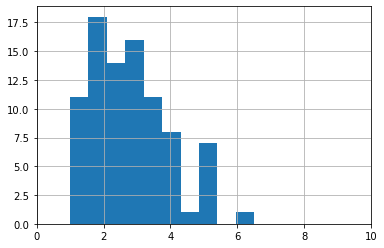

In [33]:
female_tip.hist()
plt.xlim([0, 10])

### E-commerce Dataset

In [15]:
df = pd.read_csv('e-commerce_example_dataset.csv')
df.head()

,gmv,discount,user_id
0,1324911,not-discount,1
1,1625874,not-discount,2
2,1432984,not-discount,3
3,1294427,not-discount,4
4,1635693,not-discount,5


In [16]:
df.shape

(100, 3)

<AxesSubplot:>

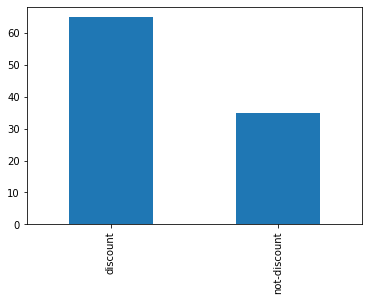

In [18]:
df['discount'].value_counts().plot(kind='bar')

In [19]:
disc = df[df['discount']=='discount']
non_disc = df[df['discount']=='not-discount']

In [20]:
disc['gmv'].mean()

1624246.553846154

In [21]:
non_disc['gmv'].mean()

1400420.4

In [22]:
disc['gmv'].std()

379730.52671323024

In [23]:
non_disc['gmv'].std()

117037.86961170756

(700000.0, 2750000.0)

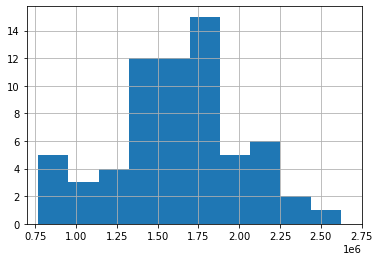

In [28]:
disc['gmv'].hist()
plt.xlim([700000, 2750000])

(700000.0, 2750000.0)

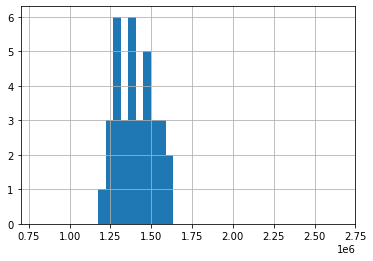

In [27]:
non_disc['gmv'].hist()
plt.xlim([700000, 2750000])

Membuat pernyataan hipotesa

H0: rata-rata Gross Merchandise Value (GMV) dari kelompok diskon **sama dengan** rata-rata GMV dari kelompok non diskon

H1: rata-rata Gross Merchandise Value (GMV) dari kelompok diskon **tidak sama dengan** rata-rata GMV dari kelompok non diskon


In [29]:
ttest_ecom = st.ttest_ind(a=disc['gmv'], b=non_disc['gmv'], equal_var=False)
ttest_ecom

Ttest_indResult(statistic=4.381379304228691, pvalue=3.398180189931703e-05)

Cukup Bukti untuk menentang H0

## Analysis of Variance (ANOVA)

In [39]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

![iris](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

Uji One-Way ANOVA

H0: Lebar sepal untuk ketiga kategori species **sama**


H1: Lebar sepal untuk ketiga kategori species **tidak sama**

In [41]:
setosa = iris[iris['Species']=='Iris-setosa']
versicolor = iris[iris['Species']=='Iris-versicolor']
virginica = iris[iris['Species']=='Iris-virginica']

In [42]:
setosa['SepalWidthCm'].mean()

3.4180000000000006

In [43]:
versicolor['SepalWidthCm'].mean()

2.7700000000000005

In [44]:
virginica['SepalWidthCm'].mean()

2.9739999999999998

In [45]:
anova_iris = st.f_oneway(setosa['SepalWidthCm'], versicolor['SepalWidthCm'], virginica['SepalWidthCm'])

In [46]:
anova_iris

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

Cukup bukti untuk menentang H0

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols # Ordinary least square
model = ols('SepalWidthCm ~ Species', data=iris).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

In [48]:
anova_table

,sum_sq,df,F,PR(>F)
Species,10.9776,2.0,47.364461,1.327917e-16
Residual,17.0350,147.0,NaN,NaN


In [49]:
pairwise = model.t_test_pairwise('Species')
pairwise.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Iris-versicolor-Iris-setosa,-0.648,0.068084,-9.517713,4.979528e-17,-0.782549,-0.513451,0.000000e+00,True
Iris-virginica-Iris-setosa,-0.444,0.068084,-6.521396,1.050058e-09,-0.578549,-0.309451,2.100115e-09,True
Iris-virginica-Iris-versicolor,0.204,0.068084,2.996317,3.208418e-03,0.069451,0.338549,3.208418e-03,True


## A/B Testing

In [50]:
df_ab = pd.read_csv('ab_data.csv')
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [51]:
df_ab.shape

(294478, 5)

<AxesSubplot:>

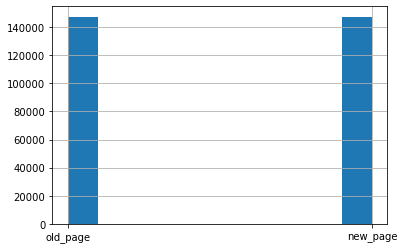

In [52]:
df_ab['landing_page'].hist()

In [53]:
import statsmodels.stats.proportion as sp

In [54]:
old = df_ab[df_ab['landing_page']=='old_page']
new = df_ab[df_ab['landing_page']=='new_page']

In [57]:
len(old)

147239

In [58]:
old['converted'].sum()

17739

In [59]:
17739/147239

0.12047759085568362

In [55]:
old['converted'].mean() # proporsi user penerima old design yang converted

0.12047759085568362

In [56]:
new['converted'].mean() # proporsi user penerima new design yang converted

0.11884079625642663

H0: Design lama dan design baru memiliki conversion rate yang **sama**


H1: Design lama dan design baru memiliki conversion rate yang **tidak sama**

In [60]:
old_sum = old['converted'].sum()
new_sum = new['converted'].sum()
old_size = len(old)
new_size = len(new)

In [61]:
abtest = sp.proportions_ztest(np.array([old_sum, new_sum]), np.array([old_size, new_size]))

In [62]:
abtest

(1.3683341399998907, 0.17120750909314209)

In [63]:
abtest[1] # P value

0.17120750909314209

Belum cukup bukti untuk menentang H0